In [1]:
import sklearn.metrics as metrics
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from evaluacion_funciones import *

In [2]:
# Carga de datos.
datos = load_iris()
datos.data = datos.data[:,2:] # Tomamos solo 2 atributos.

In [3]:
# Construcción del algoritmo de aprendizaje.
seed = 1
algoritmos = {'LOGR': LogisticRegression(solver='sag',
                      max_iter=1000, random_state=seed,
                      multi_class='ovr')}

In [4]:
# Métricas de evaluación.
metricas = {
  'ACC':    metrics.accuracy_score,
  'PREC':   lambda y_true, y_pred:
            metrics.precision_score(y_true, y_pred,
              average='micro'),
  'RECALL': lambda y_true, y_pred:
            metrics.recall_score(y_true, y_pred,
              average='micro'),
  'F1':     lambda y_true, y_pred:
            metrics.f1_score(y_true, y_pred, average='micro')}

In [5]:
# Validación y obtención de las predicciones del modelo.
seed = 1
y_pred = {}
for nombre, alg in algoritmos.items():
    y_pred[nombre] = cross_val_predict(alg,datos.data,datos.target, cv = KFold(n_splits=10, random_state=seed))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


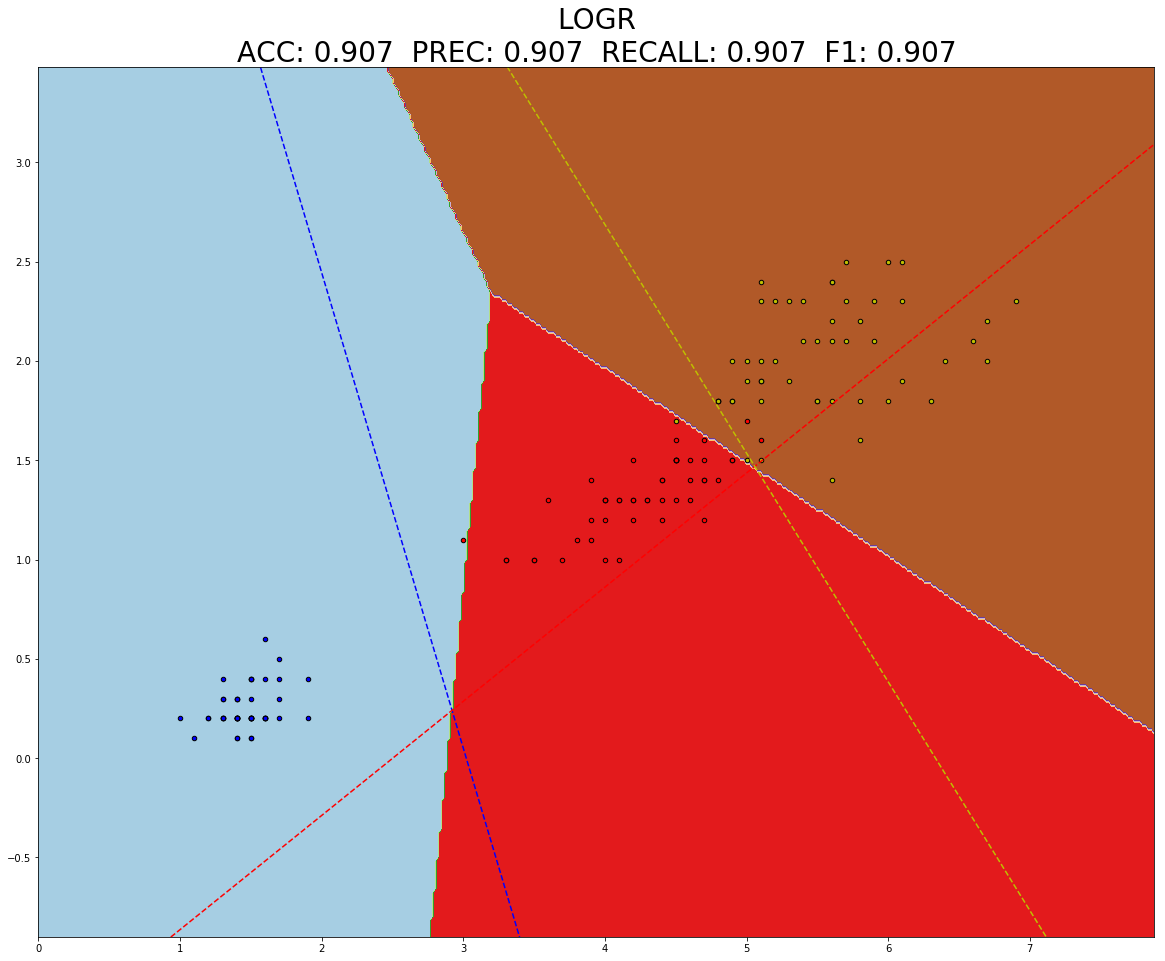

Matriz de confusión (LOGR):
[[50  0  0]
 [ 1 40  9]
 [ 0  4 46]]
Tabla de métricas (LOGR):
              precision    recall  f1-score   support

           0      0.980     1.000     0.990        50
           1      0.909     0.800     0.851        50
           2      0.836     0.920     0.876        50

   micro avg      0.907     0.907     0.907       150
   macro avg      0.909     0.907     0.906       150
weighted avg      0.909     0.907     0.906       150



In [7]:
# Evaluación y presentación de resultados.
for nombre, alg in algoritmos.items():
    eval = evaluacion(datos.target, y_pred[nombre], metricas)
    modelo_completo = alg.fit(datos.data, datos.target)
    mapa_modelo_clasif_2d(datos.data, datos.target, modelo_completo, eval, nombre)
    print("Matriz de confusión (%s):\n%s" % (nombre, metrics.confusion_matrix(datos.target, y_pred[nombre])))
    print("Tabla de métricas (%s):\n%s" % (nombre, metrics.classification_report(datos.target, y_pred[nombre], digits=3)))